<a href="https://colab.research.google.com/github/Jerry2108/Face-Recogniser/blob/main/Face-recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT ALL NECCESSARY PACKAGES**

In [4]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


**PREPROCESS IMAGE**





In [6]:
from sys import path_hooks
import os
dirname = '/content/drive/MyDrive/yalefaces/'
names = os.listdir(dirname)
#add .gif to the end of each file's name in case it does not have
for i in range(0, len(names)):
  gif = '.gif'
  #this mean we have to add '.gif' to the file's name
  if names[i].find(gif) == -1:
    oldName = dirname + names[i]
    names[i] = dirname + names[i] + gif
    os.rename(oldName, names[i])

paths = [os.path.join(dirname, image) for image in os.listdir(dirname)]
imageNames = [image for image in os.listdir(dirname)]
#faces array contains the pixel array of each image
faces = []
#label array contains ID of one image
labels = []
for i in range(len(paths)):
  image = Image.open(paths[i])
  face = np.array(image, 'uint8')
  faces.append(face)
  #get each image label's id
  label = int(imageNames[i].split('.')[0].replace('subject', ''))
  labels.append(label)
labels = np.array(labels)

**Train the model uses LBPH Classifier**

In [7]:
#create the classifier and train the model
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, labels)
lbph_classifier.write('lbph_classifier.yml')

**SAMPLE TEST**

*An image of a person that we will test is the sad faces of the person whose ID is subject01. Run this code to see the original face *

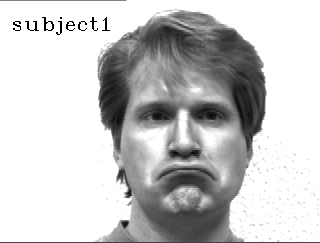

In [12]:
testPath = '/content/drive/MyDrive/yalefaces/subject01.gif'
originalImage = Image.open('/content/drive/MyDrive/yalefaces/subject01.sad.gif')
npImage = cv2.putText(np.array(originalImage), "subject1", (10, 30)
, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
#because the type of the originalImage now is of nd array so to show the actual 
#image we have to use cv2_imshow
cv2_imshow(npImage)




*The lines of code below shows the model predicts the right person ( **subject 01**)*


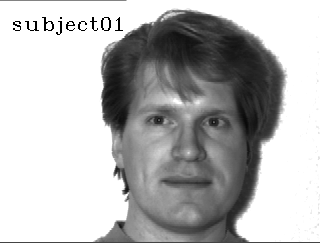

In [28]:

testInput = np.array(originalImage)
testResult = str(lbph_classifier.predict(testInput)[0])
resultImage = Image.open(f'/content/drive/MyDrive/yalefaces/subject0{testResult}.gif')
npImage = cv2.putText(np.array(resultImage), f"subject0{testResult}", (10, 30)
, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(npImage)
